In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement/placement-dataset.csv


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [5]:
dataset=pd.read_csv(r"/kaggle/input/college-placement/placement-dataset.csv")
dataset.head(3)


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0


In [7]:
dataset.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

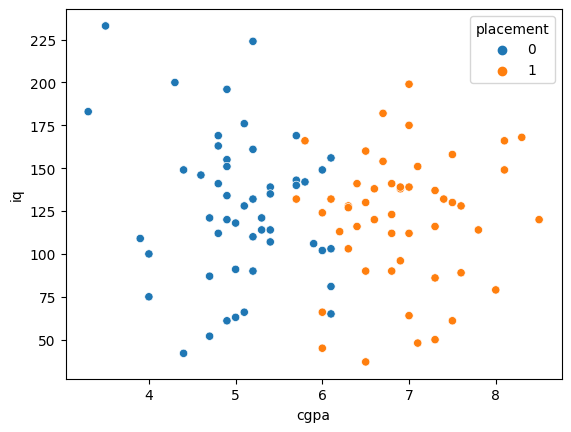

In [9]:
sns.scatterplot(x="cgpa",y="iq",data=dataset,hue="placement")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


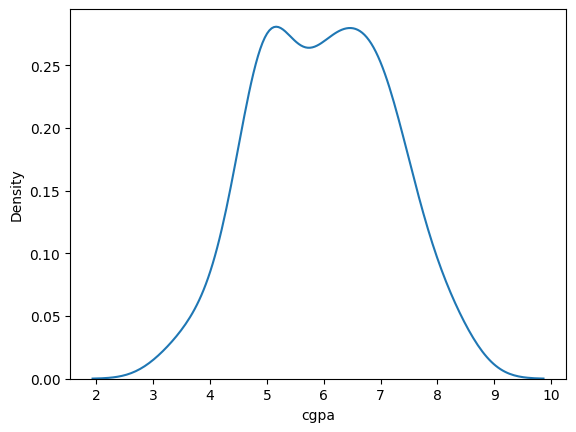

In [15]:
sns.kdeplot(data=dataset["cgpa"])
plt.show()

In [11]:
x=dataset.iloc[:,:-1]
y=dataset["placement"]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [18]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [19]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [21]:
gnb.score(x_test,y_test)*100,gnb.score(x_train,y_train)*100

(85.0, 92.5)

ValueError: Filler values must be provided when X has more than 2 training features.

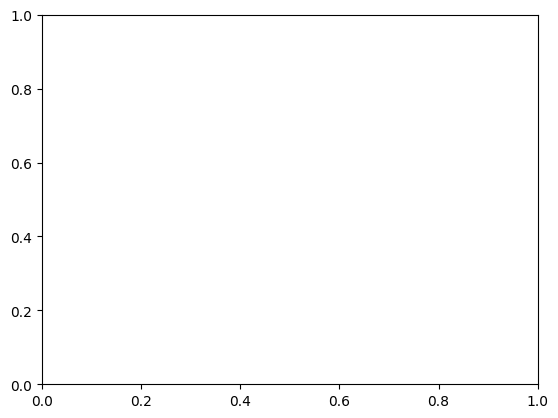

In [26]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=gnb)
plt.show()

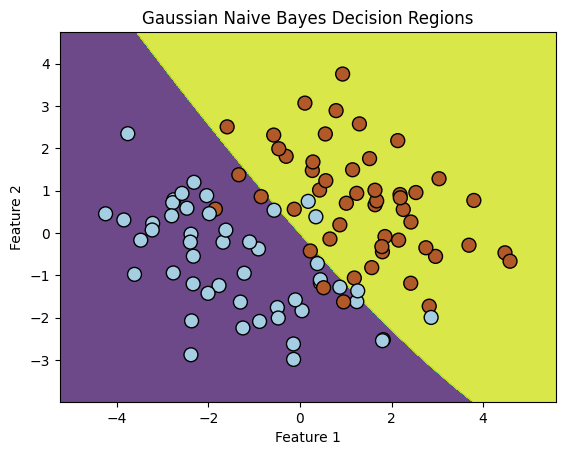

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

# Create a simple 2D dataset for classification
X, y = make_classification(random_state=42)

# If the dataset has more than 2 features, reduce the dimensionality using PCA
if X.shape[1] > 2:
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)

# Train a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, y)

# Define the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid for plotting
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class for each point in the meshgrid
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.Paired)
plt.title("Gaussian Naive Bayes Decision Regions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [22]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_test,y_test)*100,mnb.score(x_train,y_train)*100

(75.0, 60.0)

In [23]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
bnb.score(x_test,y_test)*100,bnb.score(x_train,y_train)*100

(50.0, 50.0)